# Neural Networks - Forestfires Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [4]:
fire = pd.read_csv("C:/Users/BASHAR/OneDrive/Documents/Data Science/Assignment/Assignment - 16/forestfires.csv")
fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## EDA

In [5]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
fire.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
fire[fire.duplicated()].shape

(8, 31)

In [9]:
fire[fire.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [10]:
fire1 = fire.drop_duplicates()
fire1.iloc[50:55]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
50,sep,thu,92.9,137.0,706.4,9.2,20.8,17,1.3,0.0,...,0,0,0,0,0,0,0,0,1,small
51,aug,sun,90.2,99.6,631.2,6.3,21.5,34,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
52,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
54,aug,thu,91.7,114.3,661.3,6.3,17.6,45,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small
55,sep,thu,92.9,137.0,706.4,9.2,27.7,24,2.2,0.0,...,0,0,0,0,0,0,0,0,1,small


In [12]:
fire2 = fire1.reset_index()
fire2 = fire2.drop(columns="index")
fire2.iloc[50:55]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
50,sep,thu,92.9,137.0,706.4,9.2,20.8,17,1.3,0.0,...,0,0,0,0,0,0,0,0,1,small
51,aug,sun,90.2,99.6,631.2,6.3,21.5,34,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
52,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
53,aug,thu,91.7,114.3,661.3,6.3,17.6,45,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small
54,sep,thu,92.9,137.0,706.4,9.2,27.7,24,2.2,0.0,...,0,0,0,0,0,0,0,0,1,small


In [13]:
fire3 = fire2.iloc[:,2:31]
fire3.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [14]:
fire4 = pd.get_dummies(fire3, columns=["size_category"], drop_first=True)
fire4.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category_small
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [15]:
df = fire4.iloc[:, 0:28]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,509.0,90.618075,5.555527,18.7,90.2,91.60,92.90,96.20
DMC,509.0,110.235756,63.804112,1.1,62.3,108.30,141.30,291.30
DC,509.0,547.787623,248.196222,7.9,437.7,664.20,713.90,860.60
ISI,509.0,9.023576,4.585083,0.0,6.4,8.40,11.00,56.10
temp,509.0,18.865422,5.841083,2.2,15.4,19.30,22.80,33.30
RH,509.0,44.253438,16.365192,15.0,32.0,42.00,53.00,100.00
wind,509.0,4.011395,1.800926,0.4,2.7,4.00,4.90,9.40
rain,509.0,0.020432,0.296261,0.0,0.0,0.00,0.00,6.40
area,509.0,12.992908,64.133357,0.0,0.0,0.61,6.58,1090.84
dayfri,509.0,0.163065,0.369788,0.0,0.0,0.00,0.00,1.00


## Normalization

In [42]:
array = fire4.values
array

array([[ 86.2,  26.2,  94.3, ...,   0. ,   0. ,   1. ],
       [ 90.6,  35.4, 669.1, ...,   1. ,   0. ,   1. ],
       [ 90.6,  43.7, 686.9, ...,   1. ,   0. ,   1. ],
       ...,
       [ 81.6,  56.7, 665.6, ...,   0. ,   0. ,   0. ],
       [ 94.4, 146. , 614.7, ...,   0. ,   0. ,   1. ],
       [ 79.5,   3. , 106.7, ...,   0. ,   0. ,   1. ]])

In [43]:
x = array[:,0:28]
y = array[:,28]

In [44]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [45]:
x_norm = norm_func(x)
x_norm

array([[0.07902167, 0.02401819, 0.08644714, ..., 0.        , 0.        ,
        0.        ],
       [0.08305526, 0.03245206, 0.61338051, ..., 0.        , 0.00091672,
        0.        ],
       [0.08305526, 0.04006087, 0.62969821, ..., 0.        , 0.00091672,
        0.        ],
       ...,
       [0.07480474, 0.05197829, 0.61017198, ..., 0.        , 0.        ,
        0.        ],
       [0.08653881, 0.13384181, 0.56351069, ..., 0.        , 0.        ,
        0.        ],
       [0.07287962, 0.00275017, 0.09781453, ..., 0.00091672, 0.        ,
        0.        ]])

## Train & Test Split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.33, shuffle=True)

## Building model using Neural Networks

In [64]:
model = Sequential()
model.add(Dense(18, input_dim=28, kernel_initializer="uniform", activation="relu"))
model.add(Dense(12, input_dim=18, kernel_initializer="uniform", activation="relu"))
model.add(Dense(8, input_dim=12, kernel_initializer="uniform", activation="relu"))
model.add(Dense(1, input_dim=8, kernel_initializer="uniform", activation="sigmoid"))

In [65]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [66]:
history = model.fit(x_train, y_train, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
23/23 [==============================] - 1s 10ms/step - loss: 0.6915 - accuracy: 0.7061 - val_loss: 0.6887 - val_accuracy: 0.7257
Epoch 2/150
23/23 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.7061 - val_loss: 0.6833 - val_accuracy: 0.7257
Epoch 3/150
23/23 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.7061 - val_loss: 0.6758 - val_accuracy: 0.7257
Epoch 4/150
23/23 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.7061 - val_loss: 0.6636 - val_accuracy: 0.7257
Epoch 5/150
23/23 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.7061 - val_loss: 0.6454 - val_accuracy: 0.7257
Epoch 6/150
23/23 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.7061 - val_loss: 0.6225 - val_accuracy: 0.7257
Epoch 7/150
23/23 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.7061 - val_loss: 0.6011 - val_accuracy: 0.7257
Epoch 8/150


In [67]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

11/11 [==============================] - 0s 782us/step - loss: 0.1821 - accuracy: 0.9062
accuracy: 90.62%


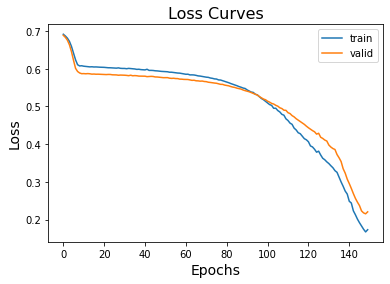

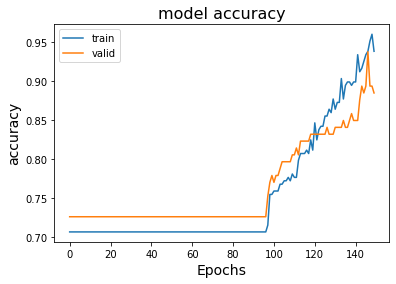

In [68]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss Curves', fontsize=16)
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.title('model accuracy', fontsize=16)
plt.show()